In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay)


In [15]:
df = pd.read_csv("mail_data.csv")
print(f"Total Samples: {len(df)}")
print("\nSample Rows:")
df.head()

Total Samples: 5572

Sample Rows:


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.columns = [col.strip().lower() for col in df.columns]

# Convert category to numeric: spam=1, ham=0
df['label'] = df['category'].map({'spam': 1, 'ham': 0})

# Drop any missing data
df = df.dropna()

X = df['message']
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Samples: {len(X_train)}")
print(f"Testing Samples : {len(X_test)}")


Training Samples: 4457
Testing Samples : 1115


In [18]:
# Converts text into numerical form while reducing importance of common words
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [19]:
model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
y_pred = model.predict(X_test_vec)

y_prob = model.predict_proba(X_test_vec)[:, 1]

print(y_pred)
print(y_prob)

[0 0 0 ... 0 0 0]
[0.07341103 0.13725807 0.04068157 ... 0.0537152  0.05179216 0.08133385]


## 1. Accuracy Score

In [21]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.975


## 2. Confusion Matrix and Interpretation


In [26]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=['Actual: Not Spam (0)', 'Actual: Spam (1)'],
    columns=['Predicted: Not Spam (0)', 'Predicted: Spam (1)']
)

print("\n CONFUSION MATRIX")
print(cm_df)

print("""
Interpretation:
- True Positives (bottom-right): Correctly detected spam emails.
- False Positives (top-right): Legitimate emails marked as spam.
- False Negatives (bottom-left): Spam emails missed by model.
- True Negatives (top-left): Correctly identified non-spam emails.
""")


 CONFUSION MATRIX
                      Predicted: Not Spam (0)  Predicted: Spam (1)
Actual: Not Spam (0)                      966                    0
Actual: Spam (1)                           28                  121

Interpretation:
- True Positives (bottom-right): Correctly detected spam emails.
- False Positives (top-right): Legitimate emails marked as spam.
- False Negatives (bottom-left): Spam emails missed by model.
- True Negatives (top-left): Correctly identified non-spam emails.



## 3. Precision, Recall, and F1 Score

In [23]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Precision: 1.000
Recall: 0.812
F1 Score: 0.896


## 4. Full Classification Report

In [28]:
print("\nCLASSIFICATION REPORT")
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

print("""
Explanation:
- Precision: Of all emails predicted as spam, how many are truly spam?
- Recall: Of all actual spam emails, how many did we catch?
- F1-Score: Balance between Precision and Recall.
- Support: Number of true instances for each class.
- Macro avg: Treats each class equally.
- Weighted avg: Weights each class by how frequent it is.
""")


CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.99       966
        Spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


Explanation:
- Precision: Of all emails predicted as spam, how many are truly spam?
- Recall: Of all actual spam emails, how many did we catch?
- F1-Score: Balance between Precision and Recall.
- Support: Number of true instances for each class.
- Macro avg: Treats each class equally.
- Weighted avg: Weights each class by how frequent it is.



## 5. ROC Curve and AUC

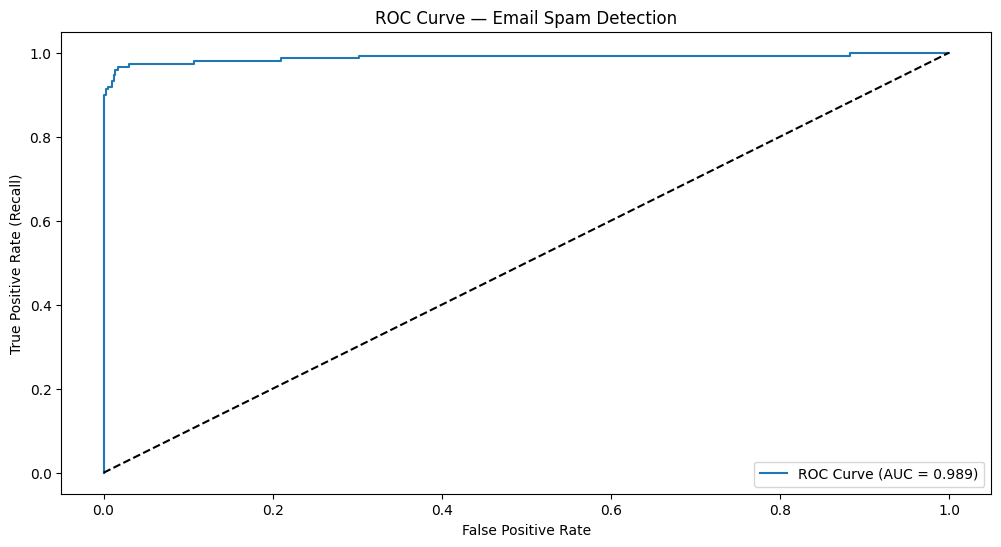


AUC (Area Under Curve): 0.989

Interpretation:
- AUC close to 1.0 means excellent ability to distinguish spam vs not spam.
- The ROC curve shows tradeoff between True Positive Rate (Recall) and False Positive Rate.



In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve — Email Spam Detection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC (Area Under Curve): {roc_auc:.3f}")
print("""
Interpretation:
- AUC close to 1.0 means excellent ability to distinguish spam vs not spam.
- The ROC curve shows tradeoff between True Positive Rate (Recall) and False Positive Rate.
""")

In [30]:
print(""" Summary:
- Accuracy: Overall correctness.
- Precision: How reliable are spam predictions.
- Recall: How many actual spam emails were caught.
- F1: Tradeoff metric balancing Precision & Recall.
- AUC: Model's discrimination ability between spam and non-spam.

Example decision-making:
- If marking normal emails as spam is bad → aim for higher Precision.
- If missing spam emails is risky → aim for higher Recall.
- If you want a balanced tradeoff → F1 score is best.
""")

 Summary:
- Accuracy: Overall correctness.
- Precision: How reliable are spam predictions.
- Recall: How many actual spam emails were caught.
- F1: Tradeoff metric balancing Precision & Recall.
- AUC: Model's discrimination ability between spam and non-spam.

Example decision-making:
- If marking normal emails as spam is bad → aim for higher Precision.
- If missing spam emails is risky → aim for higher Recall.
- If you want a balanced tradeoff → F1 score is best.

